## Alex Jurcich

Import libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.svm import SVC
from scipy.stats import pearsonr
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# **Data Setup**

Labels

In [ ]:
labels = pd.read_excel('aggregateRockData.xlsx')

Add Column names

In [ ]:
column_names = [
    "Rock number", "Category number", "Subtype number", "Token number",
    "Stimulus Type", "Frequency responded Igneous", "Frequency responded Metamorphic",
    "Frequency responded Sedimentary", "Frequency responded Old", "Frequency responded New",
    "Proportion responded Igneous", "Proportion responded Metamorphic",
    "Proportion responded Sedimentary", "Proportion responded Old"
]

labels.columns = column_names
# labels.head()
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Rock number                       539 non-null    int64  
 1   Category number                   539 non-null    int64  
 2   Subtype number                    539 non-null    int64  
 3   Token number                      539 non-null    int64  
 4   Stimulus Type                     539 non-null    int64  
 5   Frequency responded Igneous       539 non-null    int64  
 6   Frequency responded Metamorphic   539 non-null    int64  
 7   Frequency responded Sedimentary   539 non-null    int64  
 8   Frequency responded Old           539 non-null    int64  
 9   Frequency responded New           539 non-null    int64  
 10  Proportion responded Igneous      539 non-null    float64
 11  Proportion responded Metamorphic  539 non-null    float64
 12  Proporti

1: Igneous

2: Metamorphic

3: Sedimentary

Features

In [ ]:
features = pd.read_csv('feature_presence540.txt', header=None, sep='\s+')
features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1,1,1,0.20,0.15,0.00,0.0,0.00,0.05,0.0,0.30,0.0,0.00,0.10,0.32,0.0,0.00
1,2,1,2,0.65,0.15,0.00,0.0,0.05,0.00,0.0,0.10,0.0,0.05,0.05,0.70,0.0,0.05
2,3,1,3,0.60,0.00,0.00,0.0,0.05,0.00,0.0,0.35,0.0,0.00,0.05,0.60,0.0,0.00
3,4,1,4,0.10,0.85,0.00,0.0,0.05,0.00,0.0,0.10,0.0,0.00,0.10,0.86,0.0,0.00
4,5,1,5,0.35,0.80,0.00,0.0,0.00,0.00,0.0,0.10,0.0,0.00,0.05,0.87,0.0,0.00


Add column names

In [ ]:
column_names = [
    "Rock number", "Subtype number", "Token number", "Angular fragments",
    "Rounded fragments", "Straight stripes", "Curved stripes", "Physical layers",
    "Veins", "Oily/shimmery texture", "Splotchy texture", "Single translucent crystal",
    "Multiple cubic crystals", "Sandy texture","Fragments (disjunctive)",
    "Stripes (disjunctive)", "Crystals (disjunctive)"
]

features.columns = column_names
features['Rock number'] = pd.to_numeric(features['Rock number'], errors='coerce')
features.head()

,Rock number,Subtype number,Token number,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture,Fragments (disjunctive),Stripes (disjunctive),Crystals (disjunctive)
0,1.0,1,1,0.20,0.15,0.00,0.0,0.00,0.05,0.0,0.30,0.0,0.00,0.10,0.32,0.0,0.00
1,2.0,1,2,0.65,0.15,0.00,0.0,0.05,0.00,0.0,0.10,0.0,0.05,0.05,0.70,0.0,0.05
2,3.0,1,3,0.60,0.00,0.00,0.0,0.05,0.00,0.0,0.35,0.0,0.00,0.05,0.60,0.0,0.00
3,4.0,1,4,0.10,0.85,0.00,0.0,0.05,0.00,0.0,0.10,0.0,0.00,0.10,0.86,0.0,0.00
4,5.0,1,5,0.35,0.80,0.00,0.0,0.00,0.00,0.0,0.10,0.0,0.00,0.05,0.87,0.0,0.00


Combine the data

In [ ]:
df = features.merge(labels, on=['Rock number'], how='inner')
df.head()

,Rock number,Subtype number_x,Token number_x,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,...,Stimulus Type,Frequency responded Igneous,Frequency responded Metamorphic,Frequency responded Sedimentary,Frequency responded Old,Frequency responded New,Proportion responded Igneous,Proportion responded Metamorphic,Proportion responded Sedimentary,Proportion responded Old
0,2.0,1,2,0.65,0.15,0.00,0.0,0.05,0.0,0.00,...,3,59,10,13,24,58,0.719512,0.121951,0.158537,0.292683
1,3.0,1,3,0.60,0.00,0.00,0.0,0.05,0.0,0.00,...,3,37,28,17,20,62,0.451220,0.341463,0.207317,0.243902
2,4.0,1,4,0.10,0.85,0.00,0.0,0.05,0.0,0.00,...,3,41,11,30,29,53,0.500000,0.134146,0.365854,0.353659
3,5.0,1,5,0.35,0.80,0.00,0.0,0.00,0.0,0.00,...,3,42,6,34,25,57,0.512195,0.073171,0.414634,0.304878
4,6.0,1,6,0.40,0.25,0.00,0.0,0.00,0.0,0.05,...,3,69,8,4,28,53,0.851852,0.098765,0.049383,0.345679


Remove unwanted columns and rows

Columns

In [ ]:
columns = ["Rock number",
    "Category number", "Token number_x", "Angular fragments",
    "Rounded fragments", "Straight stripes", "Curved stripes", "Physical layers",
    "Veins", "Oily/shimmery texture", "Splotchy texture", "Single translucent crystal",
    "Multiple cubic crystals", "Sandy texture"
    ]
df_end = df.copy()
df_end = df_end[columns]
df = df[columns]
df = df.drop('Rock number', axis=1)
df.rename(columns={'Token number_x': 'Token number'}, inplace=True)
df.head()

,Category number,Token number,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture
0,1,2,0.65,0.15,0.00,0.0,0.05,0.0,0.00,0.10,0.0,0.05,0.05
1,1,3,0.60,0.00,0.00,0.0,0.05,0.0,0.00,0.35,0.0,0.00,0.05
2,1,4,0.10,0.85,0.00,0.0,0.05,0.0,0.00,0.10,0.0,0.00,0.10
3,1,5,0.35,0.80,0.00,0.0,0.00,0.0,0.00,0.10,0.0,0.00,0.05
4,1,6,0.40,0.25,0.00,0.0,0.00,0.0,0.05,0.25,0.0,0.00,0.05


Rows

In [ ]:
df = df.iloc[:481]
df_end.iloc[:481]
df.tail()

,Category number,Token number,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture
476,3,14,0.00,0.00,0.00,0.0,0.45,0.05,0.0,0.05,0.0,0.0,0.20
477,3,15,0.00,0.00,0.00,0.0,0.40,0.10,0.0,0.10,0.0,0.0,0.20
478,3,16,0.00,0.00,0.00,0.0,0.55,0.00,0.0,0.05,0.0,0.0,0.15
479,1,17,0.20,0.05,0.00,0.0,0.00,0.05,0.0,0.35,0.0,0.0,0.05
480,1,18,0.60,0.25,0.00,0.0,0.00,0.00,0.0,0.05,0.0,0.0,0.20


# **Exploratory Data Analysis**

Identify Feature types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Category number             481 non-null    int64  
 1   Token number                481 non-null    object 
 2   Angular fragments           481 non-null    object 
 3   Rounded fragments           481 non-null    object 
 4   Straight stripes            481 non-null    object 
 5   Curved stripes              481 non-null    float64
 6   Physical layers             481 non-null    float64
 7   Veins                       481 non-null    float64
 8   Oily/shimmery texture       481 non-null    float64
 9   Splotchy texture            481 non-null    float64
 10  Single translucent crystal  481 non-null    float64
 11  Multiple cubic crystals     481 non-null    float64
 12  Sandy texture               481 non-null    float64
dtypes: float64(8), int64(1), object(4)


Looing at our data we see that we have 9 continuous features and 4 categorical featues. However looking at the data descriptions provided
[here](https://osf.io/cvwu9/wiki/Data%20File%20Descriptions/) all of the data should be continuous.





Convert Categorical data to Continuous

In [ ]:
columns = ['Angular fragments', 'Rounded fragments', 'Straight stripes', 'Token number']
for col in columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Verify the dtypes again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Category number             481 non-null    int64  
 1   Token number                481 non-null    int64  
 2   Angular fragments           481 non-null    float64
 3   Rounded fragments           481 non-null    float64
 4   Straight stripes            481 non-null    float64
 5   Curved stripes              481 non-null    float64
 6   Physical layers             481 non-null    float64
 7   Veins                       481 non-null    float64
 8   Oily/shimmery texture       481 non-null    float64
 9   Splotchy texture            481 non-null    float64
 10  Single translucent crystal  481 non-null    float64
 11  Multiple cubic crystals     481 non-null    float64
 12  Sandy texture               481 non-null    float64
dtypes: float64(11), int64(2)
memory usa

**Continuous Features:**

Angular Fragments, Rounded fragments, Straight stripes, Curved stripes, Physical layers, Veins, Oily/shimmery texture, splotchy texture, Single translucent crystal, Multiple cubic crystals, Sandy texture

Data Statistics

In [ ]:
df.describe()

,Category number,Token number,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,1.997921,8.553015,0.085551,0.080353,0.067588,0.042204,0.164802,0.052287,0.144179,0.141372,0.031601,0.025052,0.119917
std,0.817769,4.633415,0.195214,0.197573,0.194614,0.160813,0.216540,0.102596,0.265494,0.168212,0.135513,0.112042,0.173034
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.100000,0.000000,0.000000,0.050000
75%,3.000000,13.000000,0.050000,0.050000,0.000000,0.000000,0.200000,0.050000,0.100000,0.200000,0.000000,0.000000,0.150000
max,3.000000,18.000000,1.000000,1.000000,1.000000,1.000000,0.950000,0.900000,1.000000,0.950000,1.000000,1.000000,1.000000


We see that range of our featues is quite low ranging mainly from [0,1].

Feature Distributions

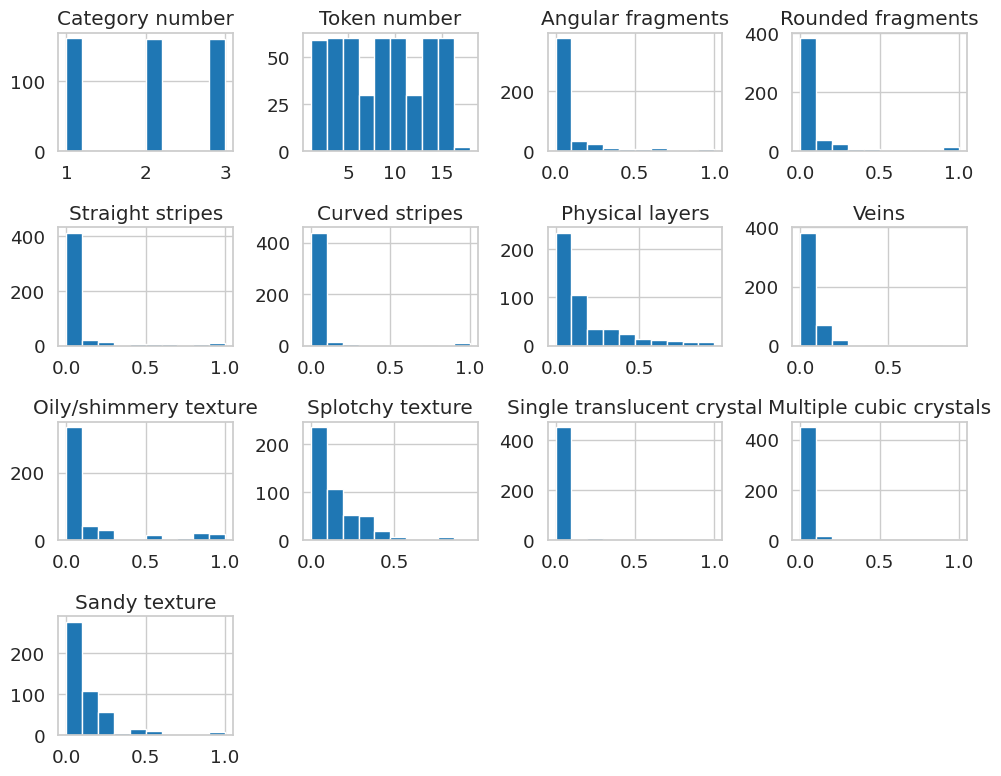

In [ ]:
df.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

We see that all of our data is skewed right, so trasnformation would be ideal. However, the data won't be effected by MinMax scaling or log transformation due to the data values being low (ranged from 0 to 1). Therefore I believe no special treatments are needed.

# **Feature Correlation**

Correlation matrix

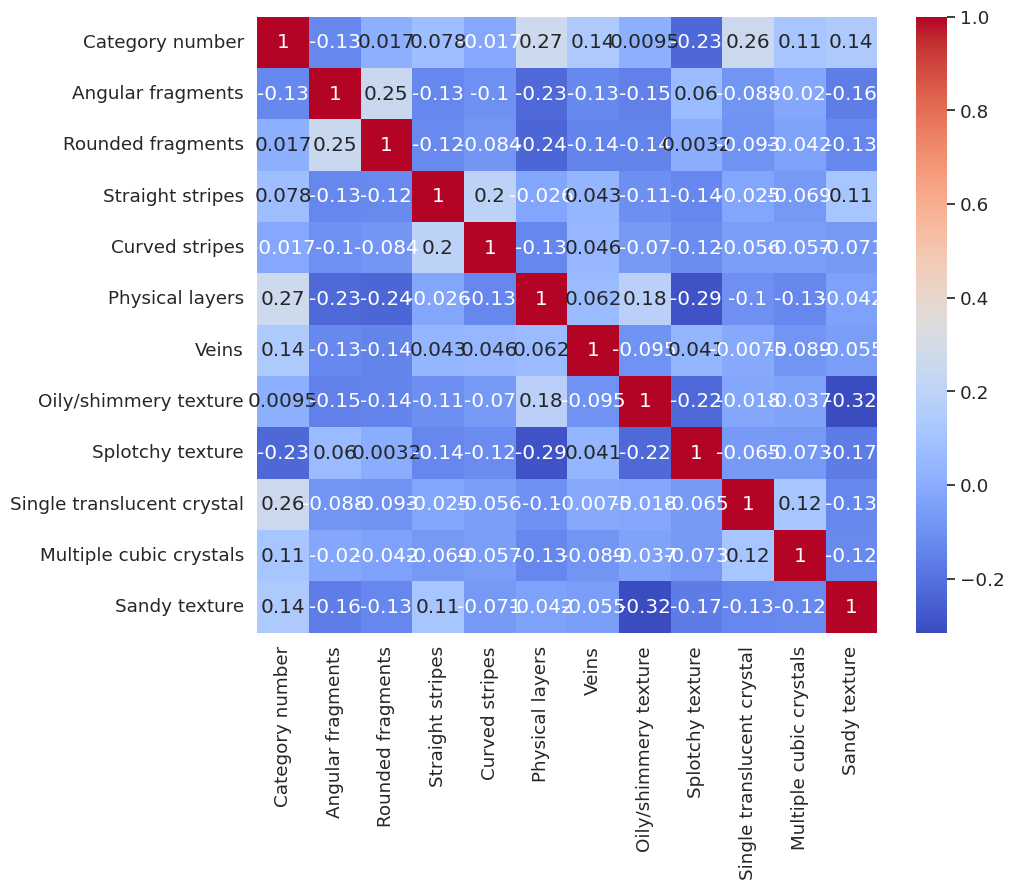

In [ ]:
corr_matrix = df.drop('Token number', axis=1).corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.show()

Scatter Plots

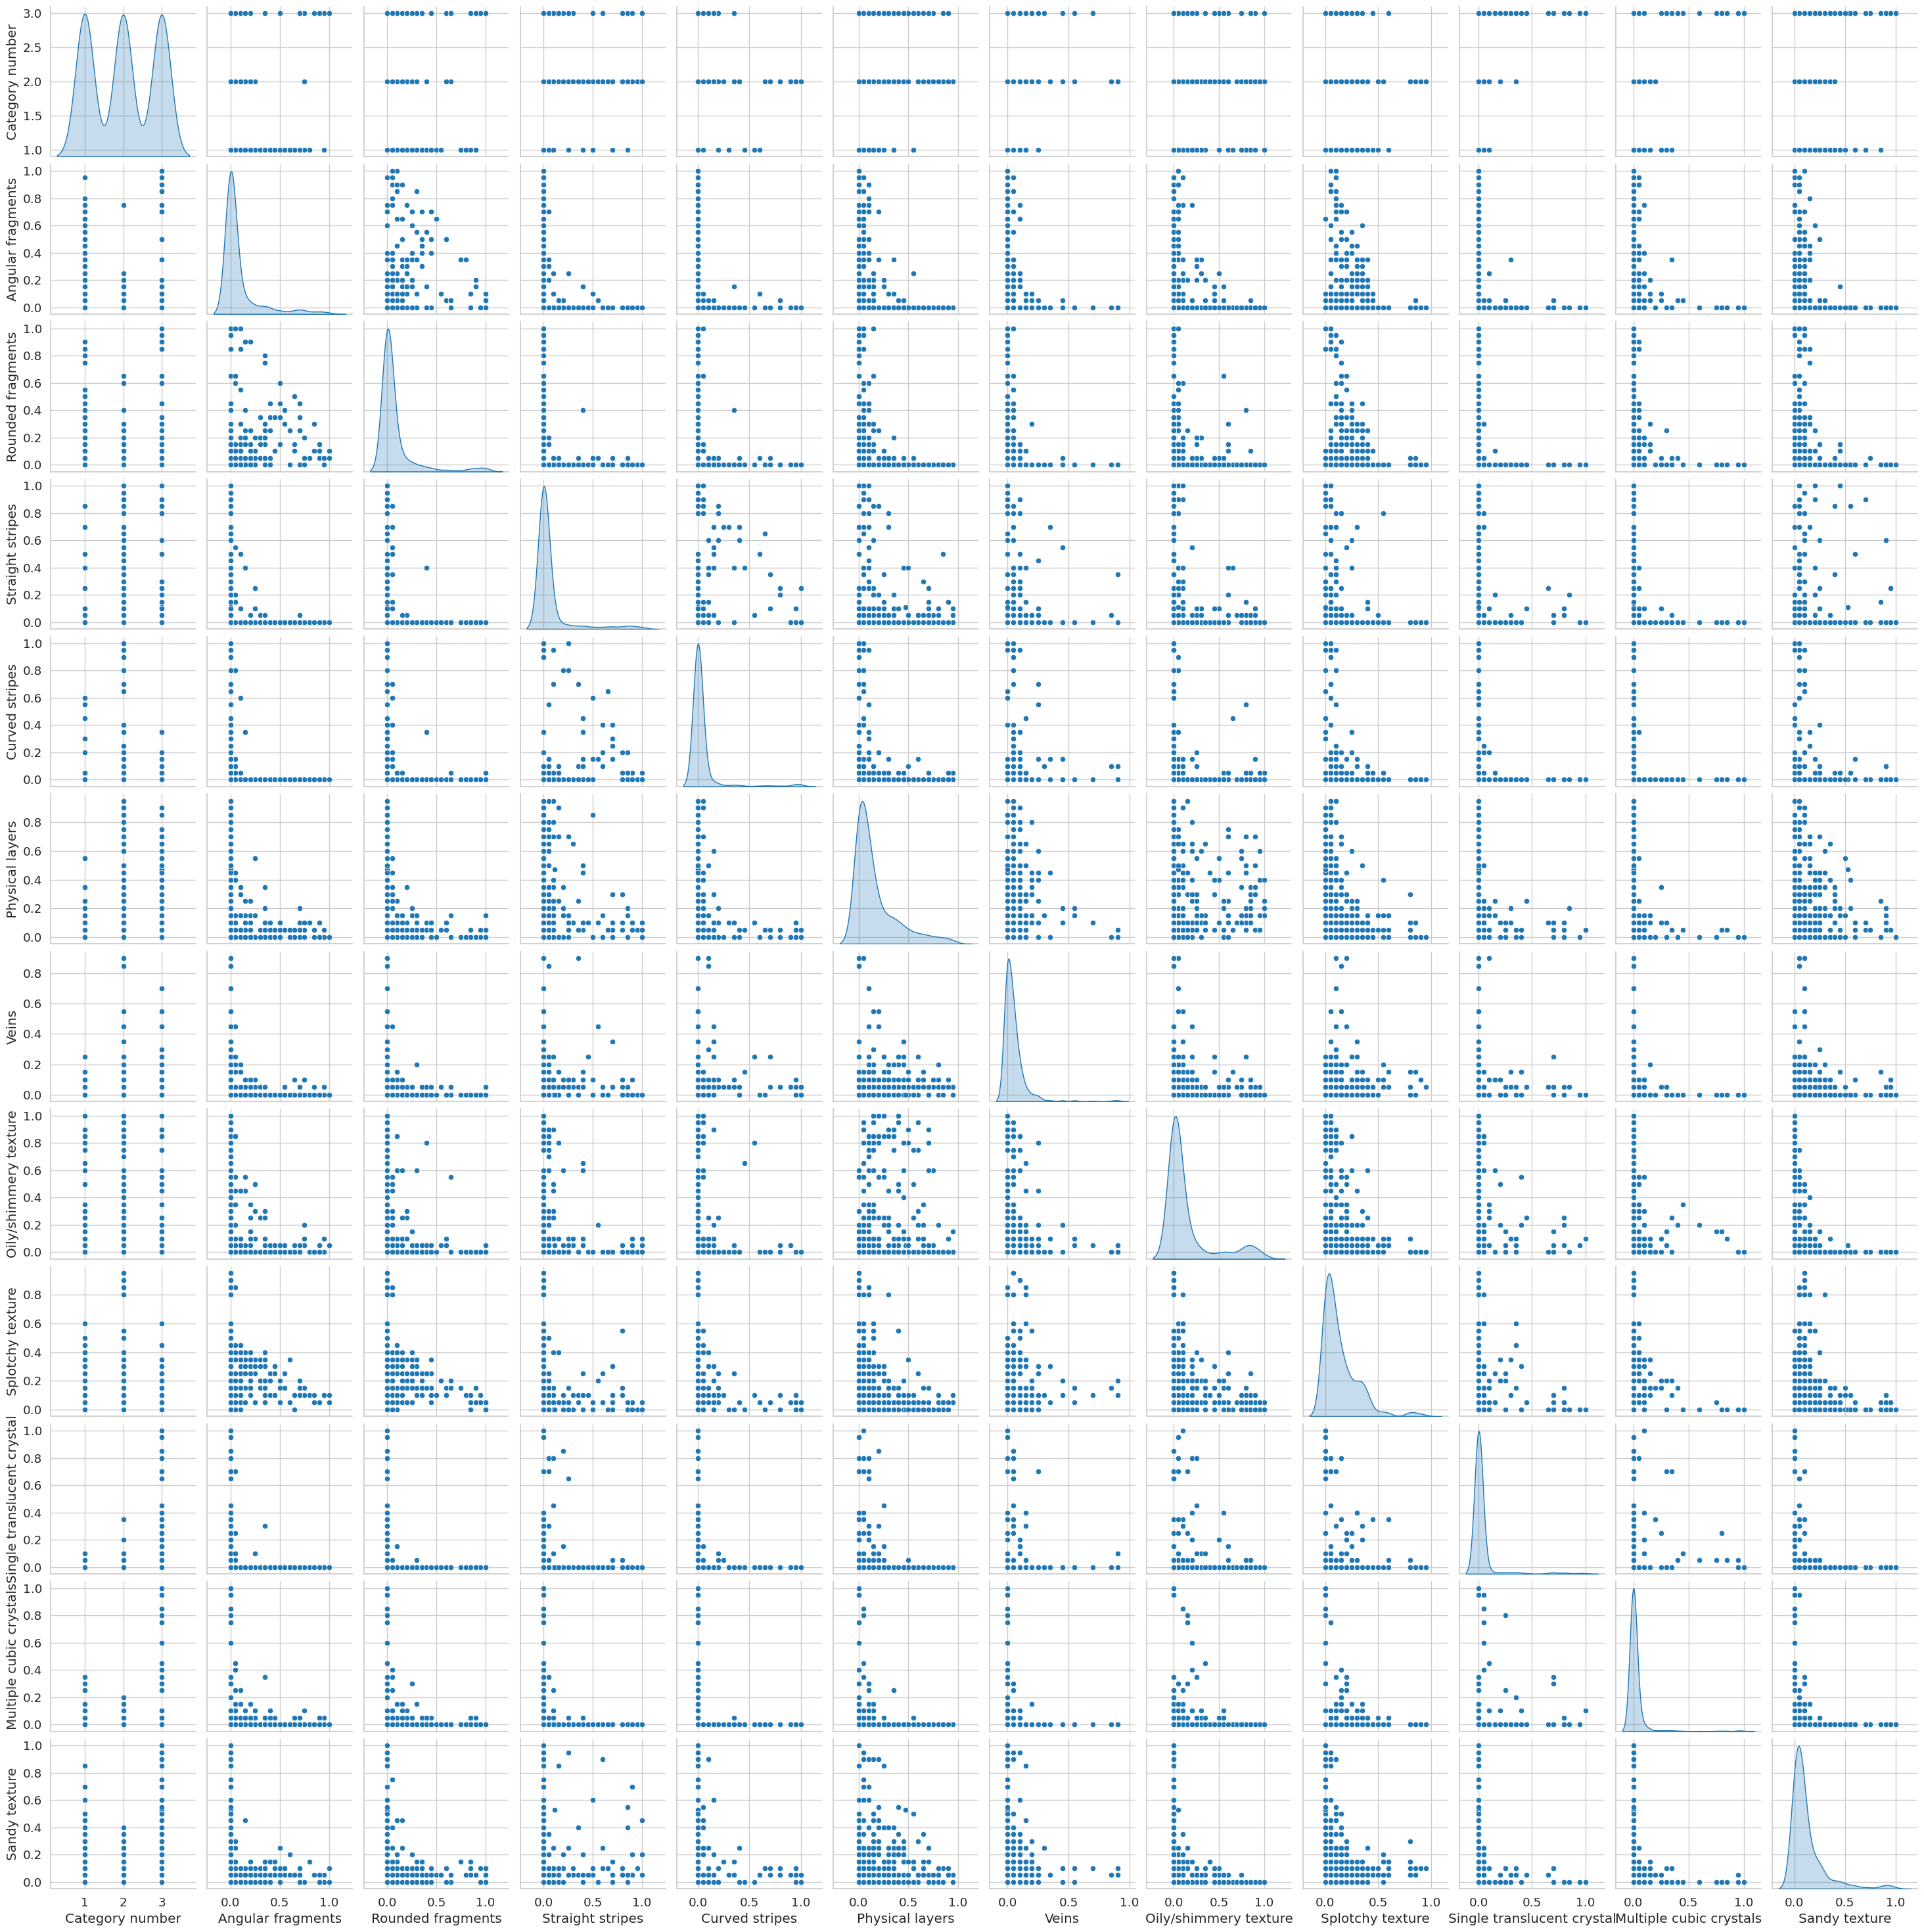

In [ ]:
scatter = sns.pairplot(df.drop('Token number', axis=1), diag_kind='kde')
plt.show()

**Sandy texture** and **Angular fragment** have a high positive correlation (0.8), suggesting they often occur together, while **Veins** and **Multiple cubic crystal**s show a moderate negative correlation (-0.31), indicating an inverse relationship. Most other correlations are weak, meaning many features are relatively independent of each other.

Correclation to Category number

In [ ]:
corr_matrix['Category number'].sort_values(ascending=False)

,Category number
Category number,1.000000
Physical layers,0.268062
Single translucent crystal,0.259087
Veins,0.141594
Sandy texture,0.139131
Multiple cubic crystals,0.114258
Straight stripes,0.078249
Rounded fragments,0.016509
Oily/shimmery texture,0.009540
Curved stripes,-0.016757


# **Split Data**

Split data

In [ ]:
train_df = df[df['Token number'].between(1,10)]

val_df = df[df['Token number'].between(11,13)]

test_df = df[df['Token number'].between(14,16)]

print("Training set size:", train_df.shape)
print("Validation set size:", val_df.shape)
print("Testing set size:", test_df.shape)


Training set size: (299, 13)
Validation set size: (90, 13)
Testing set size: (90, 13)


Split

In [ ]:
train_X = train_df.drop(['Category number', 'Token number'], axis=1)
train_y = train_df['Category number']

val_X = val_df.drop(['Category number', 'Token number'], axis=1)
val_y = val_df['Category number']

test_X = test_df.drop(['Category number', 'Token number'], axis=1)
test_y = test_df['Category number']

# **Models**

## Softmax Regresion

Define parameters for grid search

In [ ]:
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 50],
    'max_iter': [100, 200, 500, 700, 900, 1100],
    'solver': ['lbfgs', 'sag', 'saga']
}

Create Softmax Model

In [ ]:
softmax = LogisticRegression(multi_class='multinomial')

Grid Search

In [ ]:
grid_search = GridSearchCV(
    estimator=softmax,
    param_grid=parameters,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(train_X, train_y)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': 50, 'max_iter': 100, 'solver': 'lbfgs'}


Fit model with best parameters


In [ ]:
best_model = grid_search.best_estimator_

# Fit
best_model.fit(train_X, train_y)

# Predictions
train_pred = best_model.predict(train_X)

# Scores
train_accuracy = accuracy_score(train_y, train_pred)
train_precision = precision_score(train_y, train_pred, average='weighted')
train_recall = recall_score(train_y, train_pred, average='weighted')
train_f1 = f1_score(train_y, train_pred, average='weighted')

print("Training Data Performance:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print("\nDetailed Classification Report for Training Data:")
print(classification_report(train_y, train_pred))

Training Data Performance:
Accuracy: 0.6722
Precision: 0.6733
Recall: 0.6722
F1 Score: 0.6725

Detailed Classification Report for Training Data:
              precision    recall  f1-score   support

           1       0.70      0.70      0.70        99
           2       0.63      0.66      0.64       100
           3       0.69      0.66      0.67       100

    accuracy                           0.67       299
   macro avg       0.67      0.67      0.67       299
weighted avg       0.67      0.67      0.67       299



Run on Val Set

In [ ]:
# Predictions
val_pred = best_model.predict(val_X)

# Scores
val_accuracy = accuracy_score(val_y, val_pred)
val_precision = precision_score(val_y, val_pred, average='weighted')
val_recall = recall_score(val_y, val_pred, average='weighted')
val_f1 = f1_score(val_y, val_pred, average='weighted')

print("Val Data Performance:")
print(f"Accuracy: {val_accuracy:.4f}")
print(f"Precision: {val_precision:.4f}")
print(f"Recall: {val_recall:.4f}")
print(f"F1 Score: {val_f1:.4f}")
print("\nDetailed Classification Report for Val Data:")
print(classification_report(val_y, val_pred))

Val Data Performance:
Accuracy: 0.7556
Precision: 0.7622
Recall: 0.7556
F1 Score: 0.7511

Detailed Classification Report for Val Data:
              precision    recall  f1-score   support

           1       0.77      0.90      0.83        30
           2       0.70      0.77      0.73        30
           3       0.82      0.60      0.69        30

    accuracy                           0.76        90
   macro avg       0.76      0.76      0.75        90
weighted avg       0.76      0.76      0.75        90



Run on Test Set





In [ ]:
# Predictions
test_pred = best_model.predict(test_X)

# Test scores
test_accuracy = accuracy_score(test_y, test_pred)
test_precision = precision_score(test_y, test_pred, average='weighted')
test_recall = recall_score(test_y, test_pred, average='weighted')
test_f1 = f1_score(test_y, test_pred, average='weighted')

print("Test Data Performance:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print("\nDetailed Classification Report for Test Data:")
print(classification_report(test_y, test_pred))

Test Data Performance:
Accuracy: 0.7000
Precision: 0.7105
Recall: 0.7000
F1 Score: 0.6989

Detailed Classification Report for Test Data:
              precision    recall  f1-score   support

           1       0.75      0.60      0.67        30
           2       0.75      0.70      0.72        30
           3       0.63      0.80      0.71        30

    accuracy                           0.70        90
   macro avg       0.71      0.70      0.70        90
weighted avg       0.71      0.70      0.70        90



### Summary:

Softmax had an accuracy of 67.22% on the training data and 70% on the test data, with precision, recall, and F1-scores following a similar. The test set outperformed the training set, which may be a sign of underfitting. The hyperparameters used in the grid search were C and max_iter. C represents the regularization strength, where a higher C value can lead to overfitting, while a lower C can result in underfitting. Since the C value used in this model was 50 and the test accuracy was higher than the training accuracy, the model appears to be fitting the data fairly well. I fear adding more regularization to the model will lead to overfitting.

## SVM

Define parameters for grid search

In [ ]:
parameters = {
    'svm__C': [0.001, 0.01, 0.1, 1, 5],
    'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svm__degree': [2, 3],
    'svm__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}

Create SVM model

In [ ]:
svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

Grid Search

In [ ]:
grid_search = GridSearchCV(
    estimator=svm_clf,
    param_grid=parameters,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(train_X, train_y)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'svm__C': 0.1, 'svm__degree': 2, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}


Fit model with best parameters

In [ ]:
best_model = grid_search.best_estimator_

# Fit
best_model.fit(train_X, train_y)

# Predictions
train_pred = best_model.predict(train_X)

# Scores
train_accuracy = accuracy_score(train_y, train_pred)
train_precision = precision_score(train_y, train_pred, average='weighted')
train_recall = recall_score(train_y, train_pred, average='weighted')
train_f1 = f1_score(train_y, train_pred, average='weighted')

print("Training Data Performance:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print("\nDetailed Classification Report for Training Data:")
print(classification_report(train_y, train_pred))

Training Data Performance:
Accuracy: 0.6689
Precision: 0.6706
Recall: 0.6689
F1 Score: 0.6681

Detailed Classification Report for Training Data:
              precision    recall  f1-score   support

           1       0.65      0.75      0.70        99
           2       0.63      0.60      0.62       100
           3       0.73      0.66      0.69       100

    accuracy                           0.67       299
   macro avg       0.67      0.67      0.67       299
weighted avg       0.67      0.67      0.67       299



Run on Val Set

In [ ]:
# Predictions
train_pred = best_model.predict(val_X)

# Scores
train_accuracy = accuracy_score(val_y, train_pred)
train_precision = precision_score(val_y, train_pred, average='weighted')
train_recall = recall_score(val_y, train_pred, average='weighted')
train_f1 = f1_score(val_y, train_pred, average='weighted')

print("Val Data Performance:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print("\nDetailed Classification Report for Val Data:")
print(classification_report(val_y, train_pred))

Val Data Performance:
Accuracy: 0.7222
Precision: 0.7202
Recall: 0.7222
F1 Score: 0.7208

Detailed Classification Report for Val Data:
              precision    recall  f1-score   support

           1       0.78      0.83      0.81        30
           2       0.66      0.63      0.64        30
           3       0.72      0.70      0.71        30

    accuracy                           0.72        90
   macro avg       0.72      0.72      0.72        90
weighted avg       0.72      0.72      0.72        90



Run on Test Set

In [ ]:
# Predictions
train_pred = best_model.predict(test_X)

# Scores
train_accuracy = accuracy_score(test_y, train_pred)
train_precision = precision_score(test_y, train_pred, average='weighted')
train_recall = recall_score(test_y, train_pred, average='weighted')
train_f1 = f1_score(test_y, train_pred, average='weighted')

print("Test Data Performance:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print("\nDetailed Classification Report for Test Data:")
print(classification_report(test_y, train_pred))

Test Data Performance:
Accuracy: 0.6556
Precision: 0.6549
Recall: 0.6556
F1 Score: 0.6544

Detailed Classification Report for Test Data:
              precision    recall  f1-score   support

           1       0.67      0.73      0.70        30
           2       0.64      0.60      0.62        30
           3       0.66      0.63      0.64        30

    accuracy                           0.66        90
   macro avg       0.65      0.66      0.65        90
weighted avg       0.65      0.66      0.65        90



### Summary

The SVM model performed with an accuracy of 66.89% on the training data and 65.56% on the test data. The precision, recall, and F1-scores followed a similar trend across both datasets. The validation set outperformed the training set, which may suggest slight overfitting on the training data.

The hyperparameters used in the grid search were C, degree, gamma, and kernel. C represents the regularization strength; a higher value of C can lead to overfitting, while a lower value can result in underfitting. Since the best C value was 10 and the test accuracy was slightly lower than the training accuracy, the model appears to be fitting well without  overfitting or underfitting. The degree of the polynomial kernel was 2, and gamma was set to
0.1, using the rbf kernel type.

## Random Forests

Define parameters for grid search

In [ ]:
parameters = {
    'n_estimators': [100, 200],
    'max_depth': [5, 8],
    'min_samples_split': [20, 30],
    'min_samples_leaf': [10, 15],
    'max_features': ['log2']
}

Create RF model

In [ ]:
rdf_clf = RandomForestClassifier()

Grid Search

In [ ]:
grid_search = GridSearchCV(
    estimator=rdf_clf,
    param_grid=parameters,
    scoring='accuracy',
    n_jobs=-1,
)

grid_search.fit(train_X, train_y)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Best parameters: {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 15, 'min_samples_split': 30, 'n_estimators': 100}
Best cross-validation accuracy: 0.42813559322033906


Fit model with best parameters

In [ ]:
best_model = grid_search.best_estimator_

# Fit
best_model.fit(train_X, train_y)

# Predictions
train_pred = best_model.predict(train_X)

# Scores
train_accuracy = accuracy_score(train_y, train_pred)
train_precision = precision_score(train_y, train_pred, average='weighted')
train_recall = recall_score(train_y, train_pred, average='weighted')
train_f1 = f1_score(train_y, train_pred, average='weighted')

print("Training Data Performance:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print("\nDetailed Classification Report for Training Data:")
print(classification_report(train_y, train_pred))

Training Data Performance:
Accuracy: 0.6656
Precision: 0.6675
Recall: 0.6656
F1 Score: 0.6624

Detailed Classification Report for Training Data:
              precision    recall  f1-score   support

           1       0.67      0.71      0.69        99
           2       0.65      0.75      0.70       100
           3       0.68      0.54      0.60       100

    accuracy                           0.67       299
   macro avg       0.67      0.67      0.66       299
weighted avg       0.67      0.67      0.66       299



Run on Val Set

In [ ]:
# Predictions
train_pred = best_model.predict(val_X)

# Scores
train_accuracy = accuracy_score(val_y, train_pred)
train_precision = precision_score(val_y, train_pred, average='weighted')
train_recall = recall_score(val_y, train_pred, average='weighted')
train_f1 = f1_score(val_y, train_pred, average='weighted')

print("Val Data Performance:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print("\nDetailed Classification Report for Val Data:")
print(classification_report(val_y, train_pred))

Val Data Performance:
Accuracy: 0.6222
Precision: 0.6185
Recall: 0.6222
F1 Score: 0.6146

Detailed Classification Report for Val Data:
              precision    recall  f1-score   support

           1       0.68      0.77      0.72        30
           2       0.59      0.67      0.62        30
           3       0.59      0.43      0.50        30

    accuracy                           0.62        90
   macro avg       0.62      0.62      0.61        90
weighted avg       0.62      0.62      0.61        90



Run on Test Set

In [ ]:
# Predictions
train_pred = best_model.predict(test_X)

# Scores
train_accuracy = accuracy_score(test_y, train_pred)
train_precision = precision_score(test_y, train_pred, average='weighted')
train_recall = recall_score(test_y, train_pred, average='weighted')
train_f1 = f1_score(test_y, train_pred, average='weighted')

print("Test Data Performance:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print("\nDetailed Classification Report for Test Data:")
print(classification_report(test_y, train_pred))

Test Data Performance:
Accuracy: 0.6667
Precision: 0.6660
Recall: 0.6667
F1 Score: 0.6649

Detailed Classification Report for Test Data:
              precision    recall  f1-score   support

           1       0.68      0.63      0.66        30
           2       0.68      0.77      0.72        30
           3       0.64      0.60      0.62        30

    accuracy                           0.67        90
   macro avg       0.67      0.67      0.66        90
weighted avg       0.67      0.67      0.66        90



### Summary

The Random Forest model performed with an accuracy of 67.89% on the training data and 67.78% on the test data. The precision, recall, and F1-scores followed a similar trend across both datasets. The validation set outperformed the training set, which may suggest slight overfitting on the training data.

The hyperparameters used in the grid search were n_estimators. max_depth, min_sample_leaf, min_sample_split, and max_features. When I first ran the grid search my model was overfitting, so I reduced max_depth, and increased min_samples_split to reduce the overfitting. Overall the model is fitting to the data fairly well.

# **Ensemble**

Hard Voting

In [ ]:
softmax = LogisticRegression(multi_class='multinomial', C=50, max_iter=100, solver='lbfgs')

svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(C=0.1, degree=2, gamma='scale', kernel='rbf', probability=True))
])

random_forest = RandomForestClassifier(max_depth=5, min_samples_leaf=10,
                                       min_samples_split=20, n_estimators=200, max_features='log2',
                                       random_state=42)

voting_clf = VotingClassifier(
    estimators=[('soft', softmax), ('svm', svm_clf), ('rf', random_forest)],
    voting='hard'
)


models = [softmax, svm_clf, random_forest, voting_clf]
model_names = ['Softmax', 'SVM', 'Random Forest', 'Voting Ensemble']

for clf, name in zip(models, model_names):
    clf.fit(train_X, train_y)
    val_pred = clf.predict(val_X)
    val_accuracy = accuracy_score(val_y, val_pred)
    print(f"{name} Accuracy on Validation Set: {val_accuracy:.3f}")


Softmax Accuracy on Validation Set: 0.756
SVM Accuracy on Validation Set: 0.722
Random Forest Accuracy on Validation Set: 0.711
Voting Ensemble Accuracy on Validation Set: 0.767


Soft Voting

In [ ]:
softmax = LogisticRegression(multi_class='multinomial', C=50, max_iter=100, solver='lbfgs')

svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(C=0.1, degree=2, gamma='scale', kernel='rbf', probability=True))
])

random_forest = RandomForestClassifier(max_depth=5, min_samples_leaf=10,
                                       min_samples_split=20, n_estimators=200, max_features='log2',
                                       random_state=42)

voting_clf = VotingClassifier(
    estimators=[('soft', softmax), ('svm', svm_clf), ('rf', random_forest)],
    voting='soft', weights=[4, 1, 1]
)



models = [softmax, svm_clf, random_forest, voting_clf]
model_names = ['Softmax', 'SVM', 'Random Forest', 'Voting Ensemble']

for clf, name in zip(models, model_names):
    clf.fit(train_X, train_y)
    val_pred = clf.predict(val_X)
    val_accuracy = accuracy_score(val_y, val_pred)
    print(f"{name} Accuracy on Validation Set: {val_accuracy:.4f}")


Softmax Accuracy on Validation Set: 0.7556
SVM Accuracy on Validation Set: 0.7222
Random Forest Accuracy on Validation Set: 0.7111
Voting Ensemble Accuracy on Validation Set: 0.7556


Since Soft voting performed the best in our case we will consider this method on the test set.

Test Set

In [ ]:
softmax = LogisticRegression(multi_class='multinomial', C=50, max_iter=100, solver='lbfgs')

svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(C=0.1, degree=2, gamma='scale', kernel='rbf', probability=True))
])

random_forest = RandomForestClassifier(max_depth=5, min_samples_leaf=10,
                                       min_samples_split=20, n_estimators=200, max_features='log2')

voting_clf = VotingClassifier(
    estimators=[('soft', softmax), ('svm', svm_clf), ('rf', random_forest)],
    voting='soft'
)

models = [softmax, svm_clf, random_forest, voting_clf]
model_names = ['Softmax', 'SVM', 'Random Forest', 'Voting Ensemble']

for clf, name in zip(models, model_names):
    clf.fit(train_X, train_y)
    test_pred = clf.predict(test_X)
    test_accuracy = accuracy_score(test_y, test_pred)
    print(f"{name} Accuracy on Test Set: {test_accuracy:.4f}")

Softmax Accuracy on Test Set: 0.7000
SVM Accuracy on Test Set: 0.6556
Random Forest Accuracy on Test Set: 0.7556
Voting Ensemble Accuracy on Test Set: 0.7111


Overall, from the results on our test set, we see that Random Forest and Softmax are similar, giving the same result. Our final accuracy result is higher than the other models, thus the Ensamble did improve out model.

# **Model vs Human Accuarcy**

### Human Data

Read in data

In [ ]:
human_data = pd.read_csv('trialData.csv')
human_data.head()

,subid,block,trial,rocknumber,category,subtype,token,type,catresponse,recresponse,cat_correct,rec_correct
0,A1HUMXQ7SEXD8E,1,1,331,Sedimentary,Bituminous Coal,11,NonparentTraining,Metamorphic,NaN,0,NaN
1,A1HUMXQ7SEXD8E,1,2,398,Sedimentary,Dolomite,14,NonparentTraining,Igneous,NaN,0,NaN
2,A1HUMXQ7SEXD8E,1,3,19,Igneous,Basalt,3,NonparentTraining,Sedimentary,NaN,0,NaN
3,A1HUMXQ7SEXD8E,1,4,338,Sedimentary,Breccia,2,NonparentTraining,Metamorphic,NaN,0,NaN
4,A1HUMXQ7SEXD8E,1,5,60,Igneous,Gabbro,12,NonparentTraining,Sedimentary,NaN,0,NaN


See data types

In [ ]:
human_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88547 entries, 0 to 88546
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   subid        88547 non-null  object 
 1   block        88547 non-null  int64  
 2   trial        88547 non-null  int64  
 3   rocknumber   88547 non-null  int64  
 4   category     88547 non-null  object 
 5   subtype      88547 non-null  object 
 6   token        88547 non-null  int64  
 7   type         88547 non-null  object 
 8   catresponse  88547 non-null  object 
 9   recresponse  44274 non-null  object 
 10  cat_correct  88547 non-null  int64  
 11  rec_correct  44274 non-null  float64
dtypes: float64(1), int64(5), object(6)
memory usage: 8.1+ MB


Filter the data

In [ ]:
human_data = human_data[human_data['rocknumber'] <= 480]

Split the data

In [ ]:
train_data = human_data[human_data['block'].isin([1, 2, 3])]
test_data = human_data[human_data['block'] == 4]

Compute Human Accuracy

In [ ]:
train_accuracy = train_data['cat_correct'].mean()
test_accuracy = test_data['cat_correct'].mean()
print(f'train_accuracy: {train_accuracy}')
print(f'test_accuracy: {test_accuracy}')

train_accuracy: 0.5599349490660221
test_accuracy: 0.5984143924378716


Comparing the results of our best model, which was our Random Forest model, and the human accuracy we see that our model is performing better than human testing. Our model on the test set peformed at 73% where the human accuracy was 56%. A difference of 17%.

### Human Accuaracy

Average Human accuracy

In [ ]:
rock_stats = human_data.groupby('rocknumber')['cat_correct'].agg(['mean', 'std']).reset_index()
rock_stats.head()

,rocknumber,mean,std
0,1,0.746951,0.435423
1,2,0.719512,0.452002
2,3,0.451220,0.500677
3,4,0.500000,0.503077
4,5,0.512195,0.502927


Plot

In [ ]:
df_end = df_end[:481]

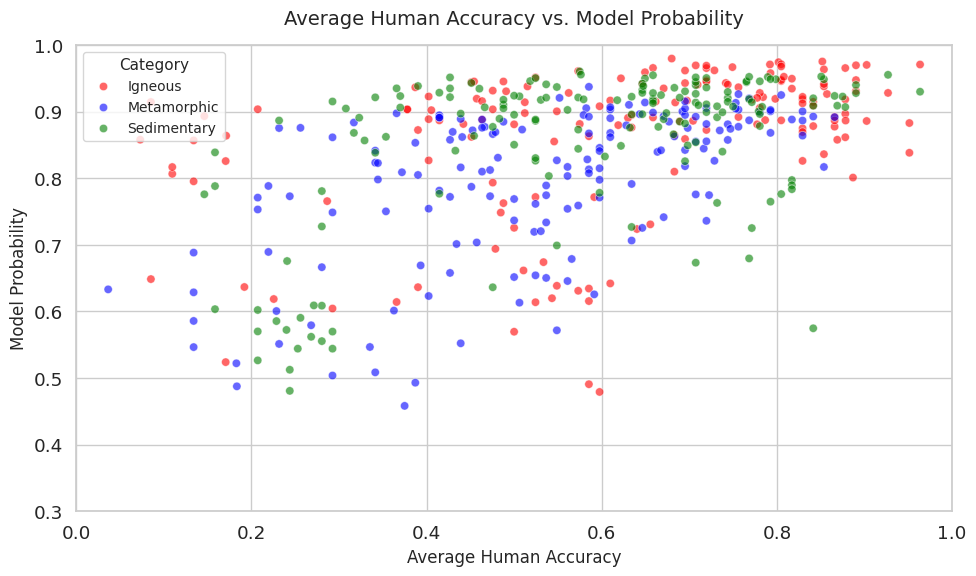

In [ ]:
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

X = df_end.drop(['Category number', 'Token number_x'], axis=1)
y = df_end['Category number']
voting_clf.fit(X, y)

human_data = human_data.rename(columns={'rocknumber': 'Rock number'})

rock_stats = human_data.groupby('Rock number')['cat_correct'].agg(['mean', 'std']).reset_index()

model_probabilities = voting_clf.predict_proba(X)
df_end['model_prob'] = model_probabilities.max(axis=1)
rock_model_probs = df_end.groupby('Rock number')['model_prob'].mean().reset_index()

merged_data = pd.merge(rock_stats, rock_model_probs, on='Rock number')
merged_data = pd.merge(merged_data, human_data[['Rock number', 'category']].drop_duplicates(), on='Rock number')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='mean', y='model_prob', hue='category',
                palette={'Igneous': 'red', 'Metamorphic': 'Blue', 'Sedimentary': 'Green'},
                sizes=50, alpha=0.6, edgecolor='w', linewidth=0.5)

plt.xlabel('Average Human Accuracy', fontsize=12)
plt.ylabel('Model Probability', fontsize=12)
plt.title('Average Human Accuracy vs. Model Probability', fontsize=14, pad=15)
plt.legend(title='Category', loc='upper left', fontsize=10, title_fontsize=11)
plt.xlim(0, 1)
plt.ylim(0.3, 1)
plt.tight_layout()
plt.show()

### Correlation Coefficient

 Correlation Coefficient

In [ ]:
categories = ['Igneous', 'Metamorphic', 'Sedimentary']
for category in categories:
    category_data = merged_data[merged_data['category'] == category]
    corr, p_value = pearsonr(category_data['mean'], category_data['model_prob'])
    print(f"Correlation for {category}: {corr:.3f}, p-value: {p_value:.3e}")

corr_all, p_value_all = pearsonr(merged_data['mean'], merged_data['model_prob'])
print(f"\nCorrelation for all rocks: {corr_all:.3f}, p-value: {p_value_all:.3e}")

Correlation for Igneous: 0.413, p-value: 6.510e-08
Correlation for Metamorphic: 0.577, p-value: 1.485e-15
Correlation for Sedimentary: 0.521, p-value: 1.685e-12

Correlation for all rocks: 0.517, p-value: 4.655e-34


When analyzing the correlation coefficents between the three categories, our hypothesis would be:

$$ H_0: \rho = 0 $$

$$ H_a: \rho > 0 $$

Since our correlation for all rocks was 0.52, at a very small (less than 1%) level of significance, we have significant evidence to reject the null hypothesis, indicating that the rocks are positively correlated.